[機械学習の入り口「線形回帰」の実装を Python × NumPy で体験](https://zero2one.jp/learningblog/machine-learning-linear-regression/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# X：30個の入力データ（身長 [cm]）
X = np.array([131, 132, 132, 133.5, 135, 142, 143.8, 144, 148, 149, 150, 152, 153, 157, 158, 158, 162, 164, 166, 169, 169.5, 170, 172, 173, 173, 176, 180, 184, 186, 190])

# Y：Xに対応する正解データ（体重 [kg]）
Y = np.array([31, 28, 35, 40, 31, 40, 42, 45, 50, 48, 56, 50, 51, 56, 65, 61, 66, 61.5, 69, 71, 63, 68, 80, 74, 76.5, 82, 68, 75, 92, 90])

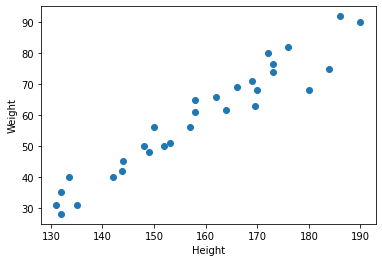

In [4]:
#グラフ表示
plt.scatter(X, Y) #散布図
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()